<a href="https://colab.research.google.com/github/MaliniVibin1502/python/blob/main/dvd_store_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Below project is done on a DVD store rental data. Here the data is being retreived from Sakila database,which was originally created by MySQL and has been open sourced under the terms of the BSD License. The schema of the database provides a clear idea about the different tables in the database.

 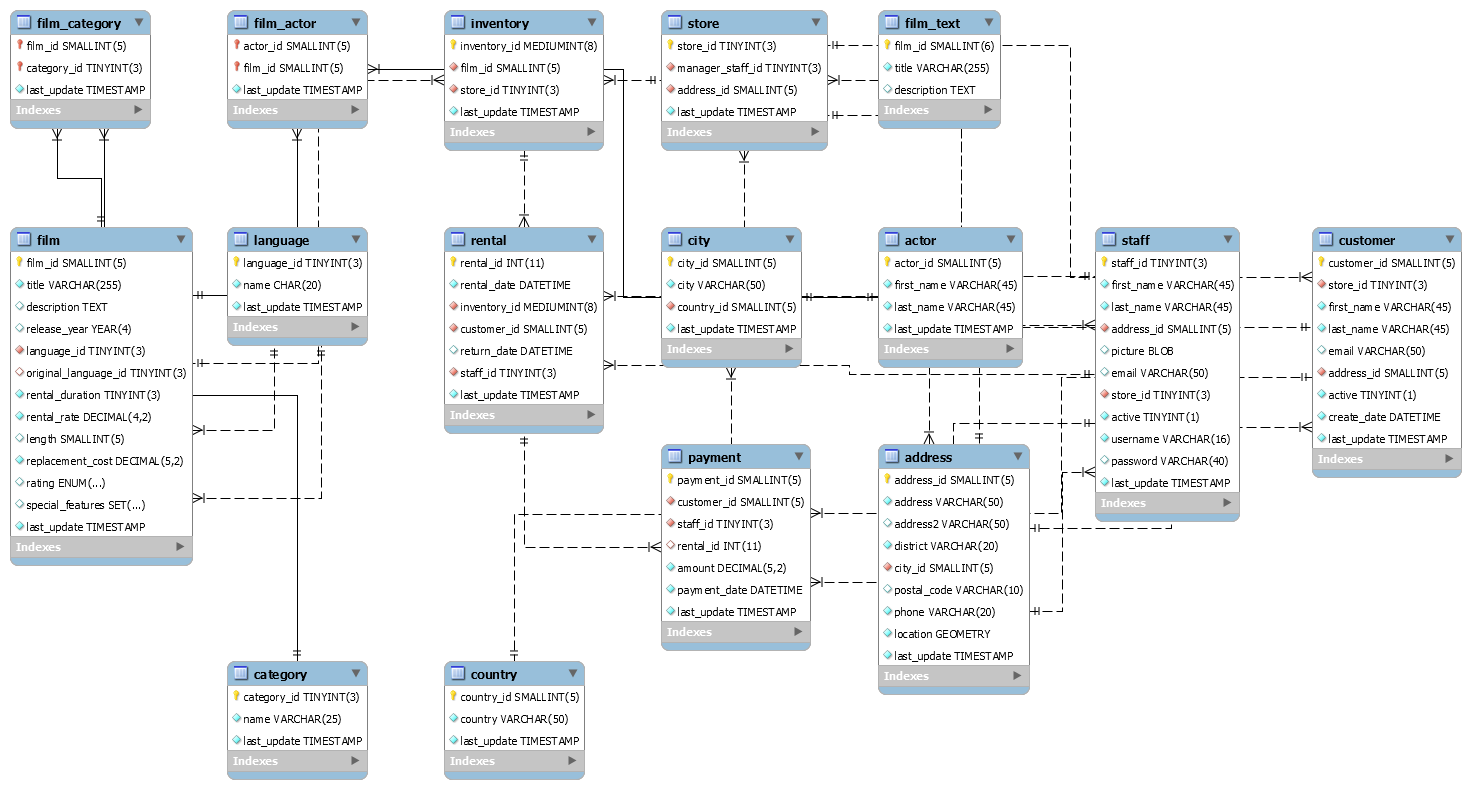

From the database specific columns are taken and some columns are renamed. To retreive important columns from tables Inner Join is used.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline

For this project databse sakila.db is saved within my Google Drive to maintain a permanent copy. The following code is written to mount the drive to Google Colab platform within the folder drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Once the drive is mounted a variable con is created to connect with sqlite3 and open the databse sakila.db

In [3]:
con = sqlite3.connect('/content/drive/MyDrive/ColabNotebooks/sakila.db')



To check if the database is open a variable obs is created to select all the content from the rental table to view the details.

In [4]:
obs = pd.read_sql('''
SELECT *
FROM rental;''', con)
print(obs)

       rental_id              rental_date  inventory_id  customer_id  \
0              1  2005-05-24 22:53:30.000           367          130   
1              2  2005-05-24 22:54:33.000          1525          459   
2              3  2005-05-24 23:03:39.000          1711          408   
3              4  2005-05-24 23:04:41.000          2452          333   
4              5  2005-05-24 23:05:21.000          2079          222   
...          ...                      ...           ...          ...   
16039      16045  2005-08-23 22:25:26.000           772           14   
16040      16046  2005-08-23 22:26:47.000          4364           74   
16041      16047  2005-08-23 22:42:48.000          2088          114   
16042      16048  2005-08-23 22:43:07.000          2019          103   
16043      16049  2005-08-23 22:50:12.000          2666          393   

                   return_date  staff_id          last_update  
0      2005-05-26 22:04:30.000         1  2019-04-11 18:11:49  
1      

As the database is now open, need to selet the rental table together with more columns from the additonal tables available in sakila.db to assign to dvd to start with the analysis.

In [5]:
dvd = pd.read_sql('''
SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', con, index_col='rental_id', parse_dates=['rental_date', 'return_date'])

We have successfully created the dataframe dvd with all the required columns from database sakila.db

In [6]:
dvd.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


Most Common rental duration and Rental rate plotted using a bar and pie plot respectively

In [7]:
duration = dvd['film_rental_duration'].value_counts()
duration

3    3412
6    3392
4    3251
5    3165
7    2824
Name: film_rental_duration, dtype: int64

<Axes: >

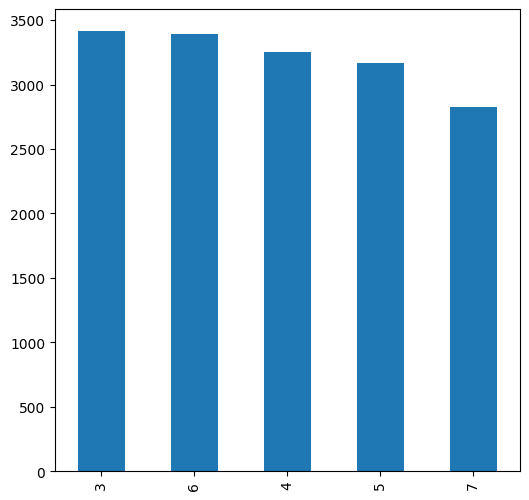

In [8]:
duration.plot(kind = 'bar', figsize=(6,6))

In [9]:
rate = dvd['film_rental_rate'].value_counts()
rate

0.99    5652
4.99    5272
2.99    5120
Name: film_rental_rate, dtype: int64

<Axes: ylabel='film_rental_rate'>

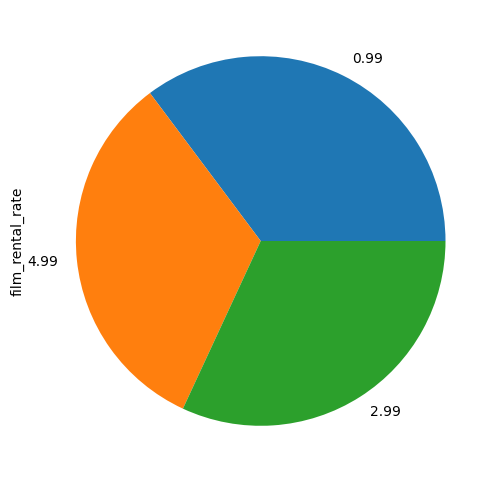

In [10]:
rate.plot(kind ='pie', figsize=(6,6))

Analysing the distribution of replacement cost using box plot and density plot

In [11]:
rep_cost = dvd['film_replacement_cost'].value_counts()
rep_cost

22.99    1044
27.99     958
21.99     912
29.99     868
12.99     864
20.99     863
14.99     821
13.99     803
11.99     749
25.99     740
26.99     737
10.99     720
28.99     716
18.99     696
17.99     691
23.99     690
9.99      684
19.99     657
16.99     639
24.99     633
15.99     559
Name: film_replacement_cost, dtype: int64

<Axes: >

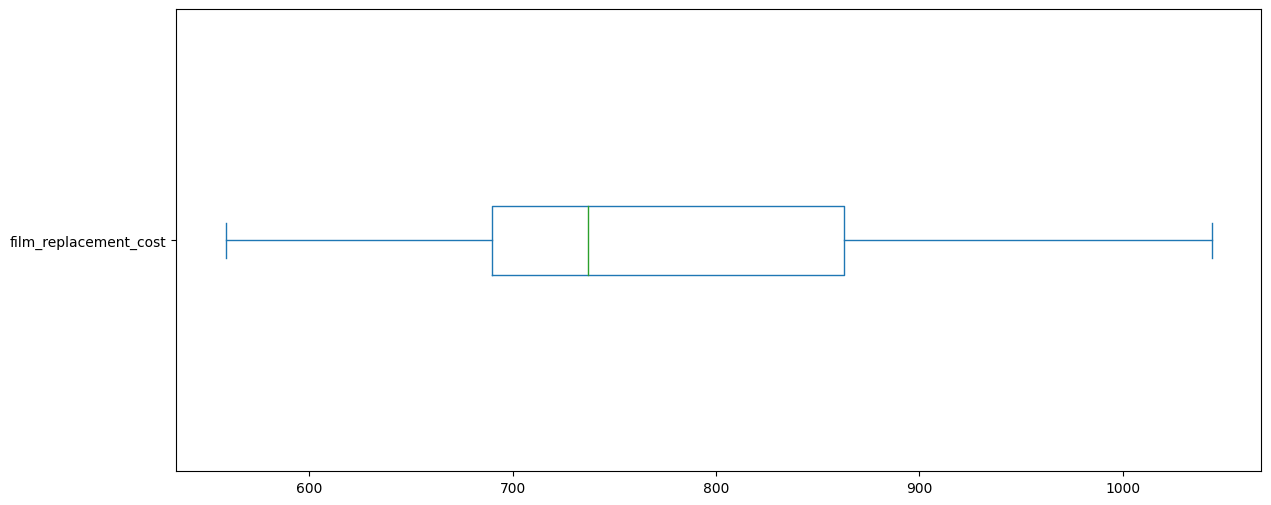

In [12]:
rep_cost.plot(kind = 'box', vert = False, figsize=(14,6))


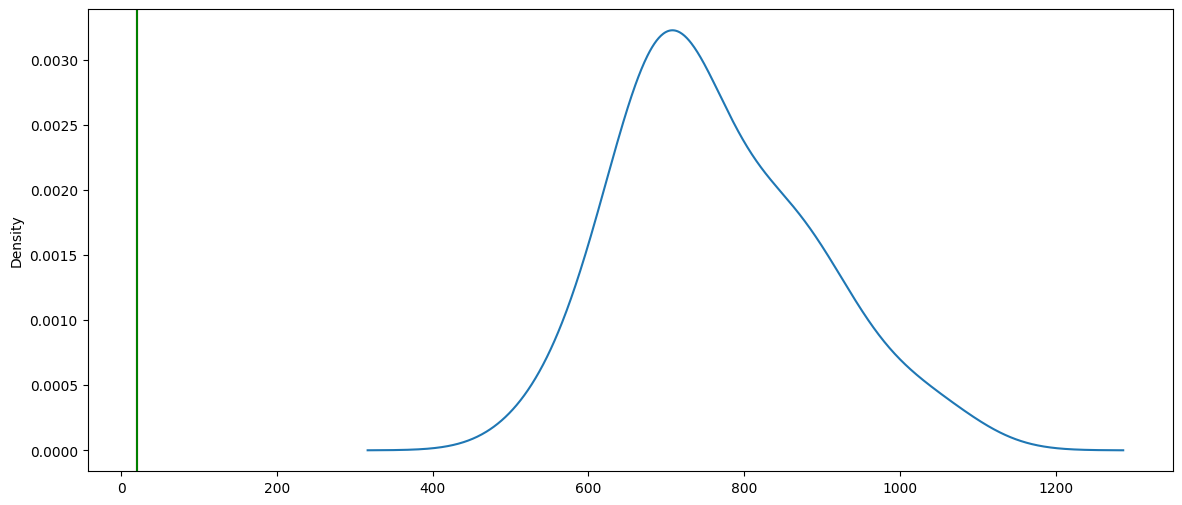

In [13]:
color_pl = rep_cost.plot(kind ='density', figsize=(14,6))
color_pl.axvline(dvd['film_replacement_cost'].mean(), color='red')
color_pl.axvline(dvd['film_replacement_cost'].median(), color='green')

Movies of each rating represented on a pie plot

In [14]:
mov_rate=dvd['film_rating'].value_counts()
mov_rate

PG-13    3585
NC-17    3293
PG       3212
R        3181
G        2773
Name: film_rating, dtype: int64

<Axes: ylabel='film_rating'>

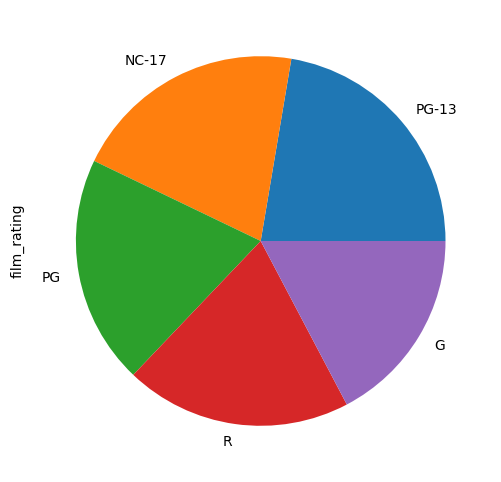

In [15]:
mov_rate.plot(kind ='pie', figsize =(6,6))

Analyse if the film replacement cost vary depending on film rating?. A better understanding can be made using a box plot that is grouped by the film rating

<Axes: title={'center': 'film_replacement_cost'}, xlabel='[film_rating]'>

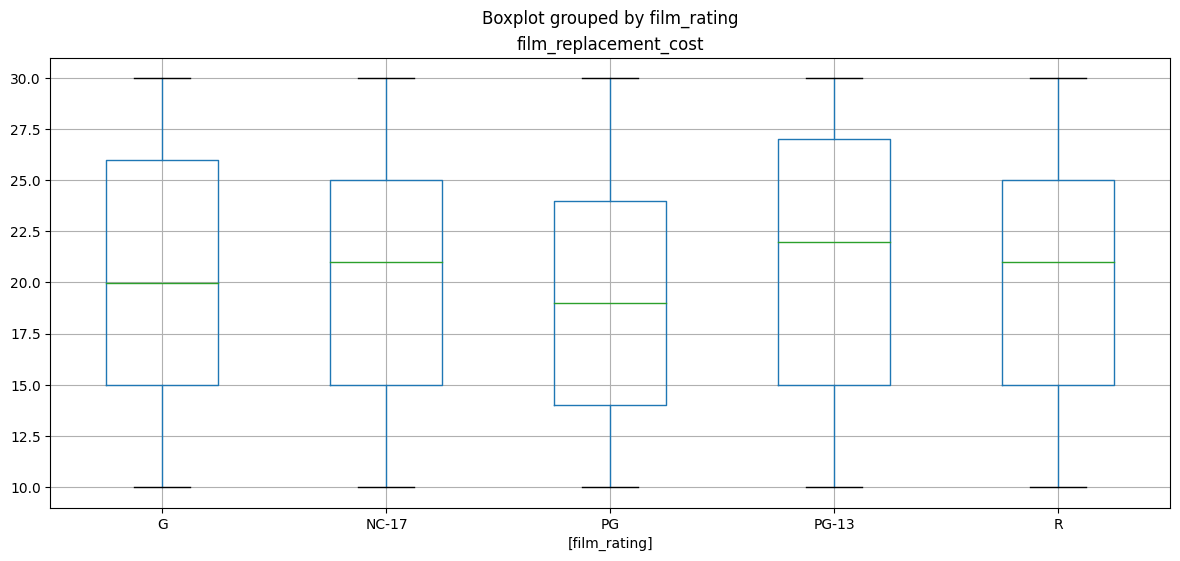

In [16]:
dvd[['film_replacement_cost', 'film_rating']].boxplot(by='film_rating', figsize=(14,6))

Finding the rental days of movies to understand the average number of days movies are being rented and returned to the store. To analyse the distribution of the number of rental days a density plot is used and the mean is calculated and colored red on the plot.

In [17]:
dvd['rent_days'] = dvd[['rental_date', 'return_date']].apply(lambda x: (x[1] - x[0]).days, axis=1)
dvd['rent_days'].head()

rental_id
1    1.0
2    3.0
3    7.0
4    9.0
5    8.0
Name: rent_days, dtype: float64

In [18]:
rent_mean= dvd['rent_days'].mean()
rent_mean

4.525944139713763

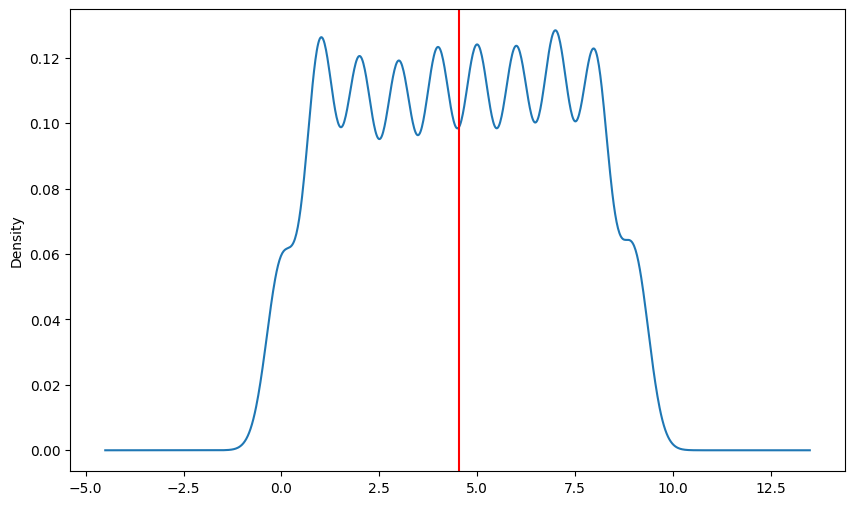

In [19]:
dvd['rent_days'].plot(kind='density',figsize=(10,6)).axvline(rent_mean, color='red')

Calculate and adding a new column film_dailyrent_rate by dividing the rental rate by rental duration. Analysing the film_dailyrent_rate using a density plot

In [20]:
dvd['film_dailyrent_rate']=dvd[['film_rental_rate', 'film_rental_duration']].apply(lambda x: (x[1]/x[0]), axis=1)
dvd['film_dailyrent_rate'].head()

rental_id
1    2.341137
2    2.341137
3    2.341137
4    6.060606
5    1.672241
Name: film_dailyrent_rate, dtype: float64

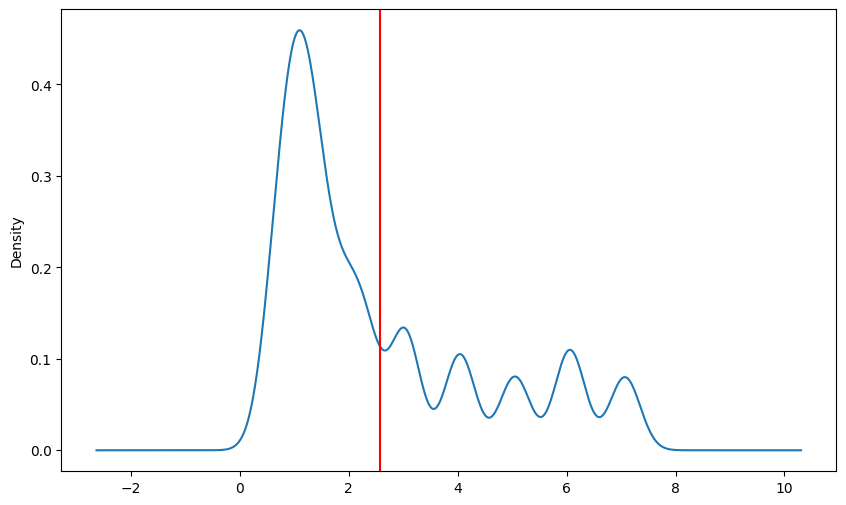

In [21]:
dvd['film_dailyrent_rate'].plot(kind='density', figsize=(10,6)).axvline(dvd['film_dailyrent_rate'].mean(), color='red')

Listing the top 10 films with the lowest and highest film_dailyrent_rate

In [22]:
dvd.loc[dvd['film_dailyrent_rate']==dvd['film_dailyrent_rate'].min()].head(10)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rent_days,film_dailyrent_rate
rental_id,,,,,,,,,,,,
13,2005-05-25 00:22:55,2005-05-30 04:28:55,MCWHORTER,1,Lethbridge,KING EVOLUTION,3,4.99,24.99,NC-17,5.0,0.601202
40,2005-05-25 05:09:04,2005-05-27 23:12:04,YEE,1,Lethbridge,MINDS TRUMAN,3,4.99,22.99,PG-13,2.0,0.601202
68,2005-05-25 09:47:31,2005-05-31 10:20:31,ORTIZ,2,Woodridge,TEEN APOLLO,3,4.99,25.99,G,6.0,0.601202
106,2005-05-25 18:18:19,2005-06-04 00:01:19,AUSTIN,2,Woodridge,SHOW LORD,3,4.99,24.99,PG-13,9.0,0.601202
116,2005-05-25 19:27:51,2005-05-26 16:23:51,GARCIA,1,Lethbridge,WIFE TURN,3,4.99,27.99,NC-17,0.0,0.601202
124,2005-05-25 20:46:11,2005-05-30 00:47:11,MENDOZA,1,Lethbridge,BACKLASH UNDEFEATED,3,4.99,24.99,PG-13,4.0,0.601202
135,2005-05-25 21:58:58,2005-06-03 17:50:58,ROYAL,1,Lethbridge,AMERICAN CIRCUS,3,4.99,17.99,R,8.0,0.601202
152,2005-05-26 00:41:10,2005-06-03 06:05:10,MORGAN,1,Lethbridge,MIDSUMMER GROUNDHOG,3,4.99,27.99,G,8.0,0.601202
155,2005-05-26 01:15:05,2005-06-01 00:03:05,BARBEE,2,Woodridge,BEHAVIOR RUNAWAY,3,4.99,20.99,PG,5.0,0.601202


In [23]:
dvd.loc[dvd['film_dailyrent_rate']==dvd['film_dailyrent_rate'].max()].head(10)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rent_days,film_dailyrent_rate
rental_id,,,,,,,,,,,,
18,2005-05-25 01:10:47,2005-05-31 06:35:47,MARTINEZ,1,Lethbridge,ROMAN PUNK,7,0.99,28.99,NC-17,6.0,7.070707
37,2005-05-25 04:44:31,2005-05-29 01:03:31,ELROD,2,Woodridge,BORROWERS BEDAZZLED,7,0.99,22.99,G,3.0,7.070707
48,2005-05-25 06:20:46,2005-06-02 05:42:46,CASTRO,1,Lethbridge,GUN BONNIE,7,0.99,27.99,G,7.0,7.070707
74,2005-05-25 11:09:48,2005-05-26 12:23:48,TERRY,2,Woodridge,GREEDY ROOTS,7,0.99,14.99,R,1.0,7.070707
76,2005-05-25 11:30:37,2005-06-03 12:00:37,SMITH,2,Woodridge,PATIENT SISTER,7,0.99,29.99,NC-17,9.0,7.070707
87,2005-05-25 13:52:43,2005-05-29 11:12:43,ROBERT,2,Woodridge,GANDHI KWAI,7,0.99,9.99,PG-13,3.0,7.070707
117,2005-05-25 19:30:46,2005-05-31 23:59:46,MILLER,2,Woodridge,VALENTINE VANISHING,7,0.99,9.99,PG-13,6.0,7.070707
133,2005-05-25 21:48:30,2005-05-30 00:26:30,GILBERT,1,Lethbridge,BORROWERS BEDAZZLED,7,0.99,22.99,G,4.0,7.070707
148,2005-05-26 00:25:23,2005-06-01 19:29:23,BURNS,2,Woodridge,UNFORGIVEN ZOOLANDER,7,0.99,15.99,PG,6.0,7.070707


Rentals made in each city. Listing the rentals made in Lethbridge city

In [24]:
dvd['rental_store_city'].value_counts()

Woodridge     8121
Lethbridge    7923
Name: rental_store_city, dtype: int64

In [25]:
dvd.loc[dvd['rental_store_city']== 'Lethbridge']

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rent_days,film_dailyrent_rate
rental_id,,,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G,1.0,2.341137
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R,9.0,6.060606
6,2005-05-24 23:08:07,2005-05-27 01:32:07,CHRISTENSON,1,Lethbridge,MYSTIC TRUMAN,5,0.99,19.99,NC-17,2.0,5.050505
8,2005-05-24 23:31:46,2005-05-27 23:33:46,ROMERO,1,Lethbridge,LAWLESS VISION,6,4.99,29.99,G,3.0,1.202405
9,2005-05-25 00:00:40,2005-05-28 00:22:40,SIMPSON,1,Lethbridge,MATRIX SNOWMAN,6,4.99,9.99,PG-13,3.0,1.202405
...,...,...,...,...,...,...,...,...,...,...,...,...
16041,2005-08-23 22:20:26,2005-08-25 20:14:26,GOMEZ,1,Lethbridge,TOMORROW HUSTLER,3,2.99,21.99,R,1.0,1.003344
16043,2005-08-23 22:21:03,2005-08-31 03:09:03,SEAL,1,Lethbridge,STING PERSONAL,3,4.99,9.99,NC-17,7.0,0.601202
16044,2005-08-23 22:24:39,2005-08-25 04:08:39,CARY,1,Lethbridge,EVERYONE CRAFT,4,0.99,29.99,PG,1.0,4.040404


Bar plot of rentals of each film rating made in Lethbridge city

In [26]:
rent_lethbridge = dvd.loc[dvd['rental_store_city']=='Lethbridge', 'film_rating'].value_counts()
rent_lethbridge

PG-13    1849
NC-17    1625
R        1537
PG       1535
G        1377
Name: film_rating, dtype: int64

<Axes: >

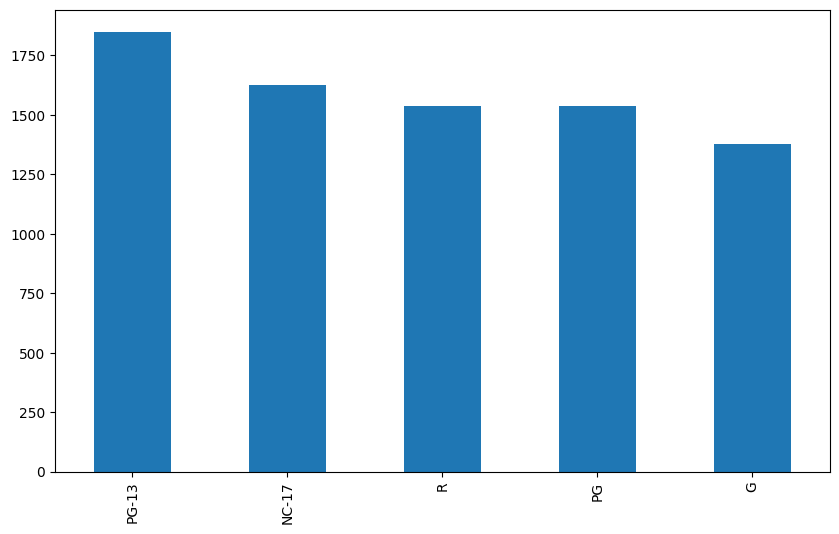

In [27]:
rent_lethbridge.plot(kind='bar', figsize=(10,6))

Bar plot of rentals made in each film_rating in Woodridge

In [34]:
rentals_wood= dvd.loc[dvd['rental_store_city']=='Woodridge', 'film_rating'].value_counts()
rentals_wood

PG-13    1736
PG       1677
NC-17    1668
R        1644
G        1396
Name: film_rating, dtype: int64

<Axes: >

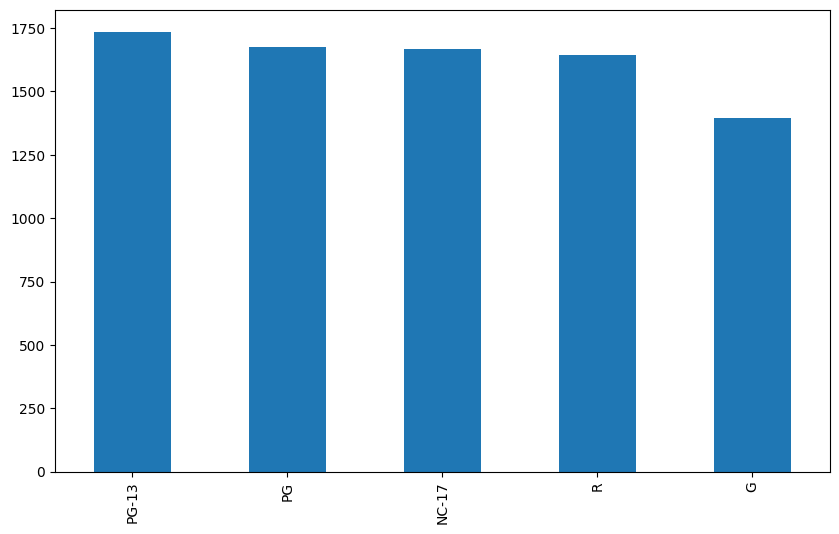

In [35]:
rentals_wood.plot(kind='bar',figsize=(10,6))

Rentals made in Woodridge city with rental duration higher than 6 days

In [43]:
dvd.loc[(dvd['rental_store_city']=='Woodridge') & (dvd['film_rental_duration'] > 6)]

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rent_days,film_dailyrent_rate
rental_id,,,,,,,,,,,,
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R,3.0,2.341137
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G,7.0,2.341137
17,2005-05-25 01:06:36,2005-05-27 00:43:36,OGLESBY,2,Woodridge,CONTACT ANONYMOUS,7,2.99,10.99,PG-13,1.0,2.341137
19,2005-05-25 01:17:24,2005-05-31 06:00:24,RICKETTS,2,Woodridge,HOLLOW JEOPARDY,7,4.99,25.99,NC-17,6.0,1.402806
36,2005-05-25 04:36:26,2005-05-29 00:31:26,HUGHES,2,Woodridge,ESCAPE METROPOLIS,7,2.99,20.99,R,3.0,2.341137
...,...,...,...,...,...,...,...,...,...,...,...,...
15984,2005-08-23 20:16:27,2005-08-27 01:43:27,BESS,2,Woodridge,HOUSE DYNAMITE,7,2.99,13.99,R,3.0,2.341137
15986,2005-08-23 20:20:37,2005-08-29 20:49:37,LITTLE,2,Woodridge,SANTA PARIS,7,2.99,23.99,PG,6.0,2.341137
15993,2005-08-23 20:28:44,2005-08-27 16:23:44,THOMAS,2,Woodridge,GILBERT PELICAN,7,0.99,13.99,G,3.0,7.070707


List the top 20 highest rented films

In [59]:
dvd['film_title'].value_counts().head(20)

BUCKET BROTHERHOOD     34
ROCKETEER MOTHER       33
FORWARD TEMPLE         32
JUGGLER HARDLY         32
SCALAWAG DUCK          32
RIDGEMONT SUBMARINE    32
GRIT CLOCKWORK         32
TIMBERLAND SKY         31
ROBBERS JOON           31
RUSH GOODFELLAS        31
NETWORK PEAK           31
WIFE TURN              31
ZORRO ARK              31
APACHE DIVINE          31
GOODFELLAS SALUTE      31
HOBBIT ALIEN           31
WITCHES PANIC          30
FROST HEAD             30
SHOCK CABIN            30
MASSACRE USUAL         30
Name: film_title, dtype: int64

Group the films by film_rating

In [65]:
dvd.groupby('film_rating')['film_title'].value_counts().to_frame()

film_title
film_rating film_title                    
G           TIMBERLAND SKY              31
            BUTTERFLY CHOCOLAT          30
            CAT CONEHEADS               30
            DOGMA FAMILY                30
            MARRIED GO                  30
...                                    ...
R           WILD APOLLO                  6
            FEVER EMPIRE                 5
            SEVEN SWARM                  5
            HARDLY ROBBERS               4
            TRAIN BUNCH                  4

[958 rows x 1 columns]

 Rentals made at the store with id 2 or with replacement cost lower than 10.99 USD

In [71]:
dvd.loc[(dvd['store_id']==2) | (dvd['film_replacement_cost'] < 10.99)]

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rent_days,film_dailyrent_rate
rental_id,,,,,,,,,,,,
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R,3.0,2.341137
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G,7.0,2.341137
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,8.0,1.672241
7,2005-05-24 23:11:53,2005-05-29 20:34:53,WALTERS,2,Woodridge,SWARM GOLD,4,0.99,12.99,PG-13,4.0,4.040404
9,2005-05-25 00:00:40,2005-05-28 00:22:40,SIMPSON,1,Lethbridge,MATRIX SNOWMAN,6,4.99,9.99,PG-13,3.0,1.202405
...,...,...,...,...,...,...,...,...,...,...,...,...
16042,2005-08-23 22:20:40,2005-08-24 17:54:40,HICKS,2,Woodridge,CHARADE DUFFEL,3,2.99,21.99,PG,0.0,1.003344
16043,2005-08-23 22:21:03,2005-08-31 03:09:03,SEAL,1,Lethbridge,STING PERSONAL,3,4.99,9.99,NC-17,7.0,0.601202
16046,2005-08-23 22:26:47,2005-08-27 18:02:47,KELLY,2,Woodridge,VOYAGE LEGALLY,6,0.99,28.99,PG-13,3.0,6.060606


List of top 10 films rented in both cities Woodridge and Lethbridge

In [101]:
dvd.loc[dvd['rental_store_city']=='Woodridge',['film_title','film_rating']].value_counts().head(10).to_frame()

,,0
film_title,film_rating,
IDOLS SNATCHERS,NC-17,20
HANGING DEEP,G,19
DETECTIVE VISION,PG-13,19
TALENTED HOMICIDE,PG,19
SALUTE APOLLO,R,19
ENGLISH BULWORTH,PG-13,18
SHOW LORD,PG-13,18
POLISH BROOKLYN,PG,18
STAGECOACH ARMAGEDDON,R,18


In [102]:
dvd.loc[dvd['rental_store_city']=='Lethbridge',['film_title','film_rating']].value_counts().head(10).to_frame()

,,0
film_title,film_rating,
LOVE SUICIDES,R,20
MADNESS ATTACKS,PG-13,18
BARBARELLA STREETCAR,G,18
WHALE BIKINI,PG-13,18
VIDEOTAPE ARSENIC,NC-17,18
VELVET TERMINATOR,R,18
MOVIE SHAKESPEARE,PG,18
JUGGLER HARDLY,PG-13,18
PULP BEVERLY,G,17
